In [1]:
from taxcalc import *
import copy
import numpy as np
import pandas as pd
from bokeh.plotting import show, output_file, figure
from bokeh.charts import Scatter, Bar
from bokeh.io import output_notebook
from bokeh.layouts import column
import matplotlib
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [2]:
in_millions = 1.0e-6
in_billions = 1.0e-9

In [3]:
income_bins = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

In [4]:
cps = pd.read_csv('/Users/andersonfrailey/Dropbox/cpsrets_age_fix.csv', index_col=None)
cps['s006'] = cps['WT']
cps['tot_benefits'] = (cps['MedicareX'] + cps['MEDICAID'] + cps['SSI'] + cps['SNAP'] + cps['SS'] + cps['VB'])
cps['dist_benefits'] = (cps['MEDICAID'] + cps['SSI'] + cps['SNAP'] + cps['VB'])
# cps['cumsum'] = np.cumsum(cps['s006'].values)
cps = utils.add_weighted_income_bins(cps, income_measure='WAS')

In [5]:
cps_grouped = pd.DataFrame(cps.groupby('bins', as_index=False).apply(utils.weighted_mean, 'tot_benefits'))

In [6]:
cps_sums = pd.DataFrame(cps.groupby('bins', as_index=False).apply(utils.weighted_sum, 'tot_benefits'))
cps_sums.index = [x for x in range(1,11)]

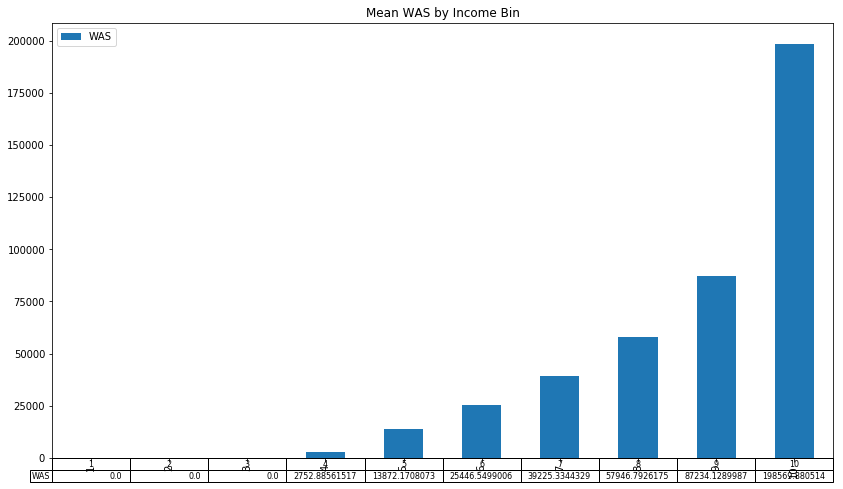

In [30]:
# Mean wage in each income bin
cps_was = pd.DataFrame(cps.groupby('bins', as_index=False).apply(utils.weighted_mean, 'WAS'))
cps_was.index = [x for x in range(1, 11)]
cps_was.columns = ['WAS']
cps_was.plot(kind='bar', figsize=(14,8), title='Mean WAS by Income Bin', table=True)

In [8]:
benefits = {'SSI': [], 'SNAP': [], 'SS': [], 'VB': [], 'MEDICAID': [], 'MedicareX': []}
for i in range(1, 11):
    for item in benefits.keys():
        pct = (cps.s006[(cps[item] > 0) & (cps['bins'] == i)].sum() / cps.s006[cps['bins'] == i].sum())
        benefits[item].append(pct)
benefits = pd.DataFrame.from_dict(benefits)
benefits.index = [x for x in range(1, 11)]

In [9]:
fig = figure(title='Participation Rates by Bin')
colors = ['red', 'blue', 'orange', 'green', 'purple', 'pink']
i = 0
for item in benefits.columns:
    fig.line(benefits.index, benefits[item], legend=item, color=colors[i], line_width=2)
    i += 1
fig.legend.location = 'top_right'
fig.legend.orientation = 'vertical'
show(fig)

In [10]:
means = {'SSI': [], 'SNAP': [], 'SS': [], 'VB': [], 'MEDICAID': [], 'MedicareX': []}
for i in range(1, 11):
    for item in benefits.keys():
        pct = ((cps[item][(cps[item] > 0) & (cps['bins'] == i)] *
                cps['s006'][(cps[item] > 0) & (cps['bins'] == i)]).sum() / (cps.s006[(cps['bins'] == i) &
                                                                                     (cps[item] > 0) &
                                                                                     (cps['bins'] == i)]).sum())
        means[item].append(pct)
means = pd.DataFrame.from_dict(means)
means.index = [x for x in range(1, 11)]

fig = figure(title='Average Benefit by Bin - Participants')
colors = ['red', 'blue', 'orange', 'green', 'purple', 'pink']
i = 0
for item in means.columns:
    fig.line(means.index, means[item], legend=item, color=colors[i], line_width=2)
    i += 1
fig.legend.location = 'top_center'
fig.legend.orientation = 'horizontal'
show(fig)

Participation Rates of Each Program

In [11]:
benefits

,MEDICAID,MedicareX,SNAP,SS,SSI,VB
1,0.322196,0.477723,0.197366,0.544161,0.057609,0.040461
2,0.315472,0.467863,0.164672,0.521660,0.052930,0.052478
3,0.354363,0.491572,0.203923,0.549554,0.068377,0.044678
4,0.311428,0.145897,0.153194,0.178802,0.033580,0.017959
5,0.309929,0.120512,0.199110,0.154093,0.023237,0.011877
6,0.225272,0.104731,0.105339,0.134017,0.021953,0.018189
7,0.186160,0.106271,0.065376,0.138342,0.022833,0.016664
8,0.162210,0.101229,0.042260,0.134552,0.014739,0.017319
9,0.132768,0.080390,0.027860,0.101976,0.013450,0.018711
10,0.102360,0.071498,0.015544,0.099007,0.006378,0.019453


In [12]:
cps_grouped['bin'] = cps_grouped.index
cps_grouped.columns = ['benefits', 'bin']

In [13]:
cps_sums['bin'] = cps_sums.index
cps_sums.columns = ['benefits', 'bin']
cps_sums['benefits'] = cps_sums['benefits']
cps_sums_bar = Bar(cps_sums, 'bin', 'benefits', agg='sum', legend=None,
                   title='Total Benefits - Billions')
show(cps_sums_bar)

In [14]:
cps_bar = Bar(cps_grouped, 'bin', 'benefits', agg='mean', legend=None,
              title='Average Total Benefits')
show(cps_bar)

In [15]:
cps_ss = pd.DataFrame(cps.groupby('bins').apply(utils.weighted_mean, 'SS'))
cps_ss['bin'] = cps_ss.index
cps_ss.columns = ['benefits', 'bin']
cps_bar_ss = Bar(cps_ss, 'bin', 'benefits', agg='mean', legend=None,
                 title='Social Security')
show(cps_bar_ss)

In [16]:
cps_ssi = pd.DataFrame(cps.groupby('bins').apply(utils.weighted_mean, 'SSI'))
cps_ssi['bin'] = cps_ssi.index
cps_ssi.columns = ['benefits', 'bin']
cps_bar_ssi = Bar(cps_ssi, 'bin', 'benefits', agg='mean', legend=None,
                 title='SSI')
show(cps_bar_ssi)

In [17]:
cps_snap = pd.DataFrame(cps.groupby('bins').apply(utils.weighted_mean, 'SNAP'))
cps_snap['bin'] = cps_snap.index
cps_snap.columns = ['benefits', 'bin']
cps_bar_snap = Bar(cps_snap, 'bin', 'benefits', agg='mean', legend=None,
                 title='SNAP')
show(cps_bar_snap)

In [18]:
cps_vb = pd.DataFrame(cps.groupby('bins').apply(utils.weighted_mean, 'VB'))
cps_vb['bin'] = cps_vb.index
cps_vb.columns = ['benefits', 'bin']
cps_bar_vb = Bar(cps_vb, 'bin', 'benefits', agg='mean', legend=None,
                 title='VB')
show(cps_bar_vb)

In [19]:
cps_care = pd.DataFrame(cps.groupby('bins').apply(utils.weighted_mean, 'MedicareX'))
cps_care['bin'] = cps_care.index
cps_care.columns = ['benefits', 'bin']
cps_bar_care = Bar(cps_care, 'bin', 'benefits', agg='mean', legend=None,
                 title='Medicare')
show(cps_bar_care)

In [20]:
cps_caid = pd.DataFrame(cps.groupby('bins').apply(utils.weighted_mean, 'MEDICAID'))
cps_caid['bin'] = cps_caid.index
cps_caid.columns = ['benefits', 'bin']
cps_bar_caid = Bar(cps_snap, 'bin', 'benefits', agg='mean', legend=None,
                 title='Medicaid')
show(cps_bar_caid)

In [21]:
recs = Records('puf_benefits.csv', weights='puf_weights_new.csv', adjust_ratios='puf_ratios copy.csv')
pol = Policy()
calc = Calculator(records=recs, policy=pol, verbose=False)
calc.advance_to_year(2014)
calc.calc_all()

In [22]:
recs2 = Records('puf_benefits.csv', weights='puf_weights_new.csv', adjust_ratios='puf_ratios copy.csv')
pol2 = Policy()
tax_reform = {
    2014: {
        '_ALD_StudentLoan_hc': [1.0],
        '_ALD_SelfEmploymentTax_hc': [1.0],
        '_ALD_SelfEmp_HealthIns_hc': [1.0],
        '_ALD_KEOGH_SEP_hc': [1.0],
        '_ALD_EarlyWithdraw_hc': [1.0],
        '_ALD_Alimony_hc': [1.0],
        '_ALD_Dependents_hc': [1.0],
        '_ALD_EducatorExpenses_hc': [1.0],
        '_ALD_HSADeduction_hc': [1.0],
        '_ALD_IRAContributions_hc': [1.0],
        '_ALD_DomesticProduction_hc': [1.0],
        '_ALD_Tuition_hc': [1.0],
        '_CR_RetirementSavings_hc': [1.0],
        '_CR_ForeignTax_hc': [1.0],
        '_CR_ResidentialEnergy_hc': [1.0],
        '_CR_GeneralBusiness_hc': [1.0],
        '_CR_MinimumTax_hc': [1.0],
        '_CR_AmOppRefundable_hc': [1.0],
        '_CR_AmOppNonRefundable_hc': [1.0],
        '_CR_SchR_hc': [1.0],
        '_CR_OtherCredits_hc': [1.0],
        '_CR_Education_hc': [1.0],
        '_II_em': [0.0],
        '_STD': [[0.0, 0.0, 0.0, 0.0, 0.0]],
        '_STD_Aged': [[0.0, 0.0, 0.0, 0.0, 0.0]],
        '_ID_Medical_hc': [1.0],
        '_ID_StateLocalTax_hc': [1.0],
        '_ID_RealEstate_hc': [1.0],
        '_ID_InterestPaid_hc': [1.0],
        '_ID_Casualty_hc': [1.0],
        '_ID_Miscellaneous_hc': [1.0],
        '_CDCC_c': [0.0],
        '_CTC_c': [0.0],
        '_EITC_c': [[0.0, 0.0, 0.0, 0.0]],
        '_LLC_Expense_c': [0.0],
        '_ETC_pe_Single': [0.0],
        '_ETC_pe_Married': [0.0],
    }
}
pol2.implement_reform(tax_reform)
calc2 = Calculator(records=recs2, policy=pol2, verbose=False)
calc2.records.e02400 = np.zeros(len(calc2.records.e02400))
calc2.advance_to_year(2014)
calc2.calc_all()

In [23]:
print 'Min MTR where AGI < 0:', min(imtr[calc2.records.c00100 < 0])
print 'Max MTR where AGI < 0:', max(imtr[calc2.records.c00100 < 0])
print 'Avg MTR where AGI < 0:', imtr[calc2.records.c00100 < 0].mean()

Min MTR where AGI < 0:

NameError: name 'imtr' is not defined

In [ ]:
primary_ii = utils.xtr_graph_plot(utils.mtr_graph_data(calc, calc2, mtr_measure='itax'))
primary_fica = utils.xtr_graph_plot(utils.mtr_graph_data(calc, calc2, mtr_measure='ptax'))
secondary_ii = utils.xtr_graph_plot(utils.mtr_graph_data(calc, calc2, mars=2,
                                                         mtr_measure='itax', mtr_variable='e00200s'))
secondary_fica = utils.xtr_graph_plot(utils.mtr_graph_data(calc, calc2, mars=2,
                                                           mtr_measure='ptax', mtr_variable='e00200s'))

In [ ]:
show(column(primary_ii, secondary_ii))
show(column(primary_fica, secondary_fica))

In [ ]:
# New tax liability
tax_gain = ((calc2.records._combined - calc.records._combined) * calc2.records.s006).sum()

In [ ]:
tax_gain

In [ ]:
nu18 = (calc2.records.nu18 * calc2.records.s006).sum()
n1821 = (calc2.records.n1821 * calc2.records.s006).sum()
n21 = (calc2.records.n21 * calc2.records.s006).sum()

In [ ]:
def ubi(rev):
    ubi_18 = revenue / ((nu18 * 0.5) + n1821 + n21)
    ubi_u18 = ubi_18 * 0.5
    return ubi_18, ubi_u18

In [ ]:
# Total benefits repealed
cps_b = pd.read_csv('/Users/andersonfrailey/Dropbox/cpsrets_age_fix.csv', index_col=None)
cps_b['s006'] = cps_b['WT']
cps_b['tot_benefits'] = (cps_b['MedicareX'] + cps_b['MEDICAID'] + cps_b['SSI'] +
                         cps_b['SNAP'] + cps_b['SS'] + cps['VB'])
ben_rev = (cps_b['tot_benefits'] * cps_b['s006']).sum()

In [ ]:
recs_ss = Records('puf_benefits.csv', weights='puf_weights_new.csv', adjust_ratios='puf_ratios copy.csv')
calc_ss = Calculator(records=recs_ss, policy=Policy(), verbose=False)
calc_ss.records.e02400 = np.zeros(len(calc_ss.records.e02400))
calc_ss.advance_to_year(2014)
calc_ss.calc_all()

In [ ]:
# Loss in taxes from SS repeal
loss = ((calc_ss.records._combined - calc.records._combined) * calc_ss.records.s006).sum()
loss

In [ ]:
revenue = ben_rev + loss + tax_gain
revenue

### UBI

In [ ]:
ubi18, ubiu18 = ubi(revenue)
ubi18, ubiu18

In [ ]:
recs_ubi = Records('puf_benefits.csv', weights='puf_weights_new.csv', adjust_ratios='puf_ratios copy.csv')
pol_ubi = Policy()
pol_ubi.implement_reform(tax_reform)
ubi = {
    2014: {
        '_UBI1': [ubiu18],
        '_UBI2': [ubi18],
        '_UBI3': [ubi18]
    }
}
pol_ubi.implement_reform(ubi)
calc_ubi = Calculator(records=recs_ubi, policy=pol_ubi, verbose=False)
calc_ubi.advance_to_year(2014)
calc_ubi.calc_all()

In [ ]:
mtr_ubi = calc_ubi.mtr()
imtr_ubi = mtr_ubi[1]

In [ ]:
print 'Min MTR where AGI < 0:', min(imtr_ubi[calc_ubi.records.c00100 < 0])
print 'Max MTR where AGI < 0:', max(imtr_ubi[calc_ubi.records.c00100 < 0])
print 'Avg MTR where AGI < 0:', imtr_ubi[calc_ubi.records.c00100 < 0].mean()

In [ ]:
primary_ubi = utils.xtr_graph_plot(utils.mtr_graph_data(calc, calc_ubi, mtr_measure='itax'))
show(primary_ubi)

In [ ]:
net_gains = pd.DataFrame()
net_gains['ubi'] = copy.deepcopy(calc_ubi.records.ubi)
net_gains['taxes'] = copy.deepcopy(calc.records._combined - calc_ubi.records._combined)
net_gains['s006'] = copy.deepcopy(calc_ubi.records.s006)
net_gains['_expanded_income'] = copy.deepcopy(calc_ubi.records._expanded_income)
net_gains['net'] = net_gains['ubi'] + net_gains['taxes']

In [ ]:
net_gains = utils.add_weighted_income_bins(net_gains, income_measure='_expanded_income')
net_gains_grouped = pd.DataFrame(net_gains.groupby('bins').apply(utils.weighted_sum, 'net'))

In [ ]:
net_gains_grouped['bin'] = net_gains_grouped.index
net_gains_grouped.columns = ['net gain', 'bin']
net_gains_grouped['net gain'] = net_gains_grouped['net gain']

In [ ]:
show(Bar(net_gains_grouped, 'bin', 'net gain', legend=None,
         title='Net Gain: UBI - Taxes'))

In [ ]:
net_ben = pd.DataFrame()
net_ben['net gain'] = copy.deepcopy(net_gains_grouped['net gain'])
net_ben['cps'] = copy.deepcopy(cps_sums['benefits'])
net_ben['net'] = net_ben['net gain'] - net_ben['cps']
net_ben['type'] = 'Dollar Values'
net_ben['bin'] = net_ben.index

In [ ]:
# Welfare multiples
welfare_mult ={
    'mcare': 0.75,
    'mcaid': 0.30,
    'snap': 0.95,
    'ss': 0.95,
    'ssi': 0.95,
    'vb': 0.95
}

In [ ]:
cps_b['adj_benefit'] = ((cps_b['MedicareX'] * welfare_mult['mcare']) +
                        (cps_b['MEDICAID'] * welfare_mult['mcaid']) +
                        (cps_b['SSI'] * welfare_mult['ssi']) +
                        (cps_b['SNAP'] * welfare_mult['snap']) +
                        (cps_b['SS'] * welfare_mult['ss']) +
                        (cps_b['VB'] * welfare_mult['vb']))
cps_b = utils.add_weighted_income_bins(cps_b, income_measure='WAS')
cps_bg = pd.DataFrame(cps_b.groupby('bins', as_index=False).apply(utils.weighted_sum, 'adj_benefit'))
cps_bg.index = [x for x in range(1, 11)]
cps_bg['bin'] = cps_bg.index
cps_bg.columns = ['benefits', 'bin']

In [ ]:
net_welfare = pd.DataFrame()
net_welfare['net gain'] = copy.deepcopy(net_gains_grouped['net gain'])
net_welfare['cps'] = copy.deepcopy(cps_bg['benefits'])
net_welfare['net'] = net_welfare['net gain'] - net_welfare['cps']
net_welfare['type'] = 'Multilpliers'
net_welfare['bin'] = net_welfare.index

In [ ]:
net_graphable = pd.concat([net_ben, net_welfare])

In [ ]:
show(Bar(net_graphable, 'bin', 'net', agg='sum', group='type',
         title='UBI Benefits - Taxes - Welfare Benefit Loss'))